# WORKING ON COVID-19 REAL WORLD DATASET DOWNLOADED FROM KAGGLE


## COVID 19 DATASET

### Let start by importing pandas

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covidate = pd.read_csv("covid19data.csv")
covidate

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
#get the data description
covidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
#getting the total count of the columns
covidate.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [7]:
#getting the description of the dataset
covidate.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [9]:
#checking for nulls values in the columns
covidate.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

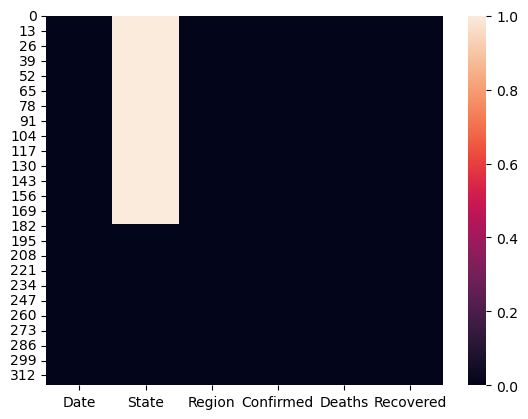

In [12]:
# getting the graph of null value using matplotlib
sns.heatmap(covidate.isnull())
plt.show()

# Questions of the data set

## 1) Show the number of confirmed deaths and and recoverded cases in each region

In [16]:
#using groupby function

covidate.groupby("Region").sum()

C:\Users\EVERISTUS\AppData\Local\Temp\ipykernel_16404\4061155502.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covidate.groupby("Region").sum()


,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [20]:
#getting the value of confirmed cases
covidate.head(5)
confirmedata = covidate.groupby("Region")["Confirmed"].sum().sort_values(ascending = False)
confirmedata

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

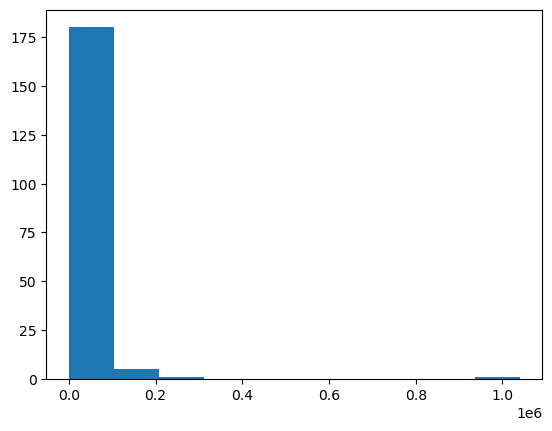

In [24]:
#sns.heatmap(confirmedata)
plt.hist(confirmedata)
plt.show()

In [26]:
#getting the value of death cases
covidate.head(5)
covidate.groupby("Region")["Deaths"].sum().sort_values(ascending = False)


Region
US             60967
Italy          27682
UK             26166
Spain          24275
France         24121
               ...  
Holy See           0
Grenada            0
South Sudan        0
Nepal              0
Laos               0
Name: Deaths, Length: 187, dtype: int64

In [27]:
#getting the value of Recovered cases
covidate.head(5)
confirmedata = covidate.groupby("Region")["Recovered"].sum().sort_values(ascending = False)
confirmedata

Region
Spain               132929
US                  120720
Germany             120400
Mainland China       77610
Iran                 73791
                     ...  
Cabo Verde               2
Yemen                    1
South Sudan              0
Papua New Guinea         0
MS Zaandam               0
Name: Recovered, Length: 187, dtype: int64

# 2) Remove all records where confirmed case is less than 10

In [42]:
#covidate.head(2)
covidate = covidate[~covidate["Confirmed"] < 10]
covidate

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


# 3) In which Region is maximum number of confirmed cases recorded ?

In [63]:
covidate.head(5)
covidate.groupby("Region")["Confirmed"].max().sort_values(ascending = False).head(20)

Region
US                299691
Spain             236899
Italy             203591
UK                165221
France            165093
Germany           161539
Turkey            117589
Russia             99399
Iran               93657
Brazil             79685
Mainland China     68128
Belgium            47859
Netherlands        38802
Peru               33931
India              33062
Switzerland        29407
Canada             26610
Ecuador            24675
Portugal           24505
Saudi Arabia       21402
Name: Confirmed, dtype: int64

# 4) In which Region is the minimum number of death cases recorded

In [67]:
covidate.head(5)
covidate.groupby("Region")["Deaths"].min().sort_values(ascending = True ).head(20)

Region
Laos                     0
Rwanda                   0
Papua New Guinea         0
Cambodia                 0
Canada                   0
Netherlands              0
Nepal                    0
Namibia                  0
Mozambique               0
Saint Kitts and Nevis    0
Mongolia                 0
Dominica                 0
Mainland China           0
Madagascar               0
Macau                    0
Eritrea                  0
Fiji                     0
France                   0
Holy See                 0
Denmark                  0
Name: Deaths, dtype: int64

# 5) How many confirmed death and recovery cases where recorded in India ?

In [80]:
covidate.head(2)
covidate[covidate["Region"] == "India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


# 6) Sort the entail data frame with the number of confirmed cases in ascending order

In [85]:
covidate.sort_values(by ="Confirmed" ,ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929
